In [1]:
%pylab inline

#from __future__ import division

import timeit

# Data handling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

print pd.__version__

Populating the interactive namespace from numpy and matplotlib
0.24.1


# Load store data

In [2]:
# More detailed data about each store
df_store = pd.read_csv('store.csv', low_memory=False)

# Data for each store for each day. Nrows ~ Nstores*Ndays
df_train = pd.read_csv('train.csv', low_memory=False)
df_test = pd.read_csv('test.csv', low_memory=False)

# Plot distribution of data

In [3]:
print(df_store.shape)
df_store.head(3)

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


## Distribution of features

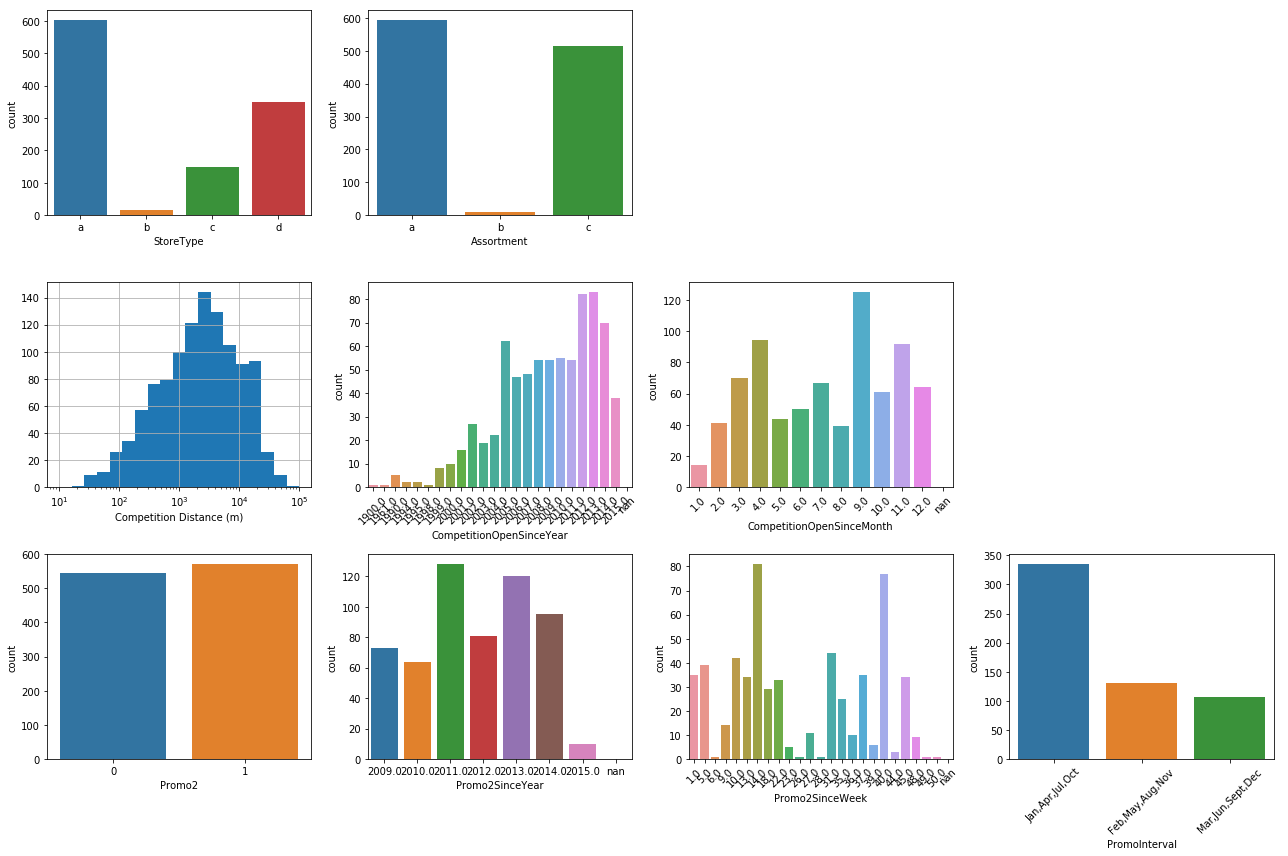

In [4]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

sns.countplot(x='StoreType', data=df_store, order=np.sort(df_store['StoreType'].unique()), ax=axes[0, 0])

sns.countplot(x='Assortment', data=df_store, order=np.sort(df_store['Assortment'].unique()), ax=axes[0, 1])

ax = df_store['CompetitionDistance'].hist(bins=np.logspace(1, 5, 20), ax=axes[1, 0])
ax.set_xscale('log')
ax.set_xlabel('Competition Distance (m)')

ax = sns.countplot(x='CompetitionOpenSinceYear', data=df_store, 
                   order=np.sort(df_store['CompetitionOpenSinceYear'].unique()), ax=axes[1, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax = sns.countplot(x='CompetitionOpenSinceMonth', data=df_store, 
                   order=np.sort(df_store['CompetitionOpenSinceMonth'].unique()), ax=axes[1, 2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

sns.countplot(x='Promo2', data=df_store, order=np.sort(df_store['Promo2'].unique()), ax=axes[2, 0])

ax = sns.countplot(x='Promo2SinceYear', data=df_store, 
                   order=np.sort(df_store['Promo2SinceYear'].unique()), ax=axes[2, 1])

ax = sns.countplot(x='Promo2SinceWeek', data=df_store, 
                   order=np.sort(df_store['Promo2SinceWeek'].unique()), ax=axes[2, 2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax = sns.countplot(x='PromoInterval', data=df_store, 
                   order=['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'], ax=axes[2, 3])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


axes[0,2].set_axis_off()
axes[0,3].set_axis_off()
axes[1,3].set_axis_off()
fig.tight_layout()

## Distribution of target variable 'Sales'

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


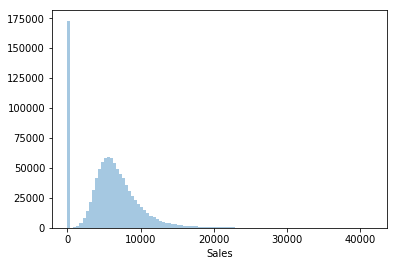

In [5]:
ax = sns.distplot(df_train['Sales'], kde=False, bins=100)
#ax.set_xscale('log')

# Dependence of daily 'Sales' on available features

In [6]:
# Pandas df.merge() performs a database-style join. Don't use the Pandas df.join() function.
df_train = df_train.merge(df_store, on='Store', how='inner')
df_test = df_test.merge(df_store, on='Store', how='inner')

In [7]:
print df_train['Date'].min(), df_train['Date'].max()
print df_test['Date'].min(), df_test['Date'].max()

2013-01-01 2015-07-31
2015-08-01 2015-09-17


In [8]:
df_train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Dependence of sales on categorical variables

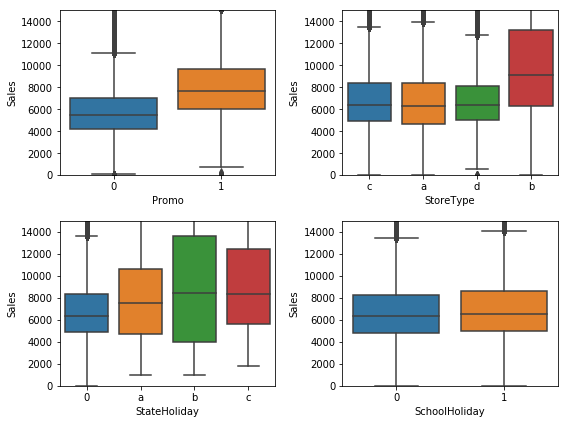

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
sns.boxplot(x='Promo', y='Sales', data=df_train[df_train['Open']==1], ax=ax1)
sns.boxplot(x='StoreType', y='Sales', data=df_train[df_train['Open']==1], ax=ax2)
sns.boxplot(x='StateHoliday', y='Sales', data=df_train[df_train['Open']==1], ax=ax3)
sns.boxplot(x='SchoolHoliday', y='Sales', data=df_train[df_train['Open']==1], ax=ax4)
ax1.set_ylim(0, 15000)
ax2.set_ylim(0, 15000)
ax3.set_ylim(0, 15000)
ax4.set_ylim(0, 15000)
fig.tight_layout()

## Dependence of sales on past performance
 * Average sales in the past

In [10]:
df_train_clean = pd.read_csv('train_clean.csv', low_memory=False)

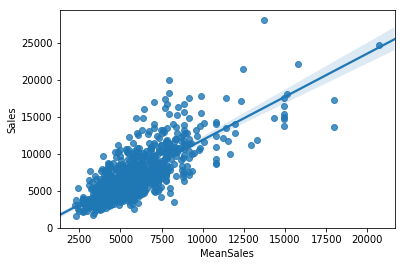

In [15]:
sns.regplot(x='MeanSales', y='Sales', data=df_train_clean[df_train_clean['Open']==1].sample(10**3))

## Dependence of sales on semi-periodic variables
 * day of week
 * day of month
 * month
 * year

(0, 11000)

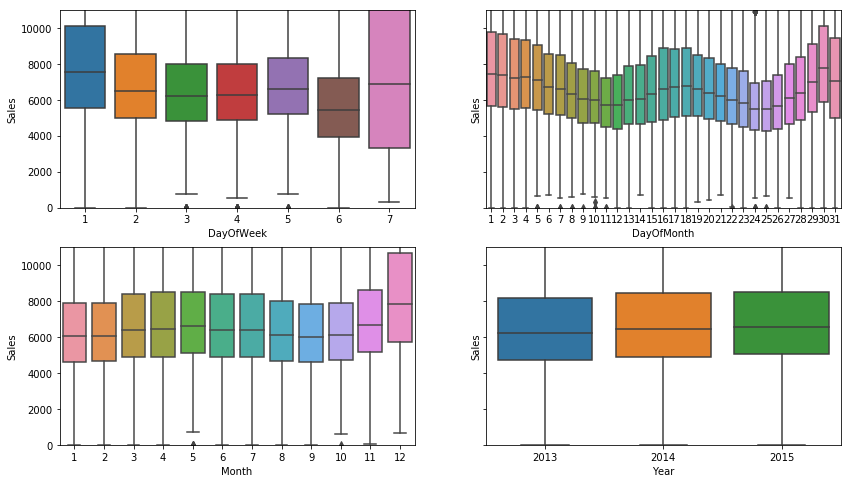

In [17]:
# Daily sales in each store (not total sales)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
sns.boxplot(x='DayOfWeek', y='Sales', data=df_train_clean[df_train_clean['Open']==1], ax=ax1)
sns.boxplot(x='DayOfMonth', y='Sales', data=df_train_clean[df_train_clean['Open']==1], ax=ax2)
sns.boxplot(x='Month', y='Sales', data=df_train_clean[df_train_clean['Open']==1], ax=ax3)
sns.boxplot(x='Year', y='Sales', data=df_train_clean[df_train_clean['Open']==1], ax=ax4)
ax1.set_ylim(0, 11000)

## Dependence on other, less important, variables

(10, 100000)

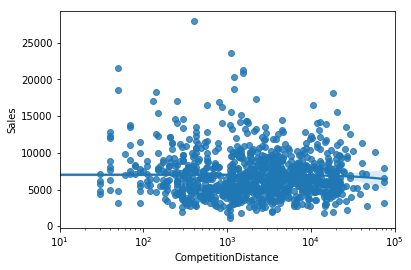

In [13]:
fig, ax = plt.subplots()
sns.regplot(x='CompetitionDistance', y='Sales', data=df_train_clean[df_train_clean['Open']==1].sample(10**3), ax=ax)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(10**1, 10**5)
#ax.set_ylim(10**2, 10**5)

(0, 10000)

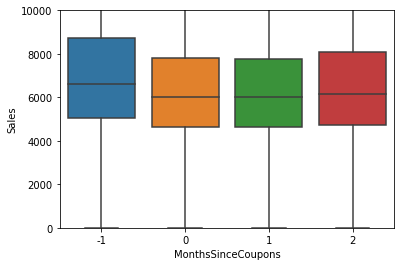

In [14]:
ax = sns.boxplot(x='MonthsSinceCoupons', y='Sales', data=df_train_clean[df_train['Open']==1])
ax.set_ylim(0, 10000)